### IDs:
Insert yours IDs to the cell below

ID #1: 205789167

ID #2: 315535351


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [13]:
from math import ceil, log, floor, factorial
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import nbinom, binom, multinomial, geom
import seaborn as sns
import pandas as pd
%matplotlib inline

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

#### Soltion 1.A

<u>The question was first solved on paper and then converted to Python function, as follows:</u>

$X ∼ Bin(N, 0.03)$

The probability of receiving a defective product out of N production of products.

The probability that at least one product is defective is given by:

$$ P(X \geq 1) = 1 - P(X = 0) $$
$$ = 1 - \binom{N}{0} \times 0.03^0 \times (1 - 0.03)^N $$
$$ = 1 - 0.97^N $$
$$ \text{For } 1 - 0.97^N = 0.85 \text{, solve for N} $$
$$ \text{Thus, } -0.97^N = -0.15 $$
$$ \text{Which implies } 0.97^N = 0.15 $$
$$ n = \frac{\log(0.15)}{\log(0.97)} $$
$$ n \approx 63 $$


Similarly, for every p and alpha, if we want to calculate N:

$$P(X \geq 1) = 1 - P(X = 0) = 1 - \left[ \binom{n}{0} p^0 (1-p)^{n-0} \right] = 1 - (1-p)^n$$
$$\Rightarrow 1-(1-p)^n =\alpha $$
$$\Rightarrow (1-p)^n = 1-\alpha \Rightarrow n = \frac{\log(1-\alpha)}{\log(1-p)}$$



In [14]:
def return_prob_products(prob_defect, prob_at_least_one):
    return ceil(log(1-prob_at_least_one, 1-prob_defect))

prob_defect = 0.03
prob_at_least_one = 0.85

number_of_products = return_prob_products(prob_defect, prob_at_least_one)
print(number_of_products)

63


#### Solution - 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [15]:
prob_defect = 0.04
prob_at_least_one = 0.95

number_of_products = return_prob_products(prob_defect, prob_at_least_one)
print(number_of_products)

74


#### Solution - 1.C

Consider the following cases and calculate how many independent samples are required:

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

##### 1.C.A

Let's define $X_1$ as the number of trials needed until the 5th defective product.

$X_1∼NBinom(p=0.1, r=5)$

Let's calculate how many independent samples are required to get the 5th defective product with the distribution above:

In [16]:
def return_num_products(prob_defect, R, bound):
    """
    Calculate the minimum number of products to inspect.
    """
    # Initialize the number of products to inspect
    N = 0

    # Increment N until the probability of finding at least 'at_least_num' defective items
    # is within the specified bound
    while (nbinom(R,prob_defect, loc=R).cdf(N)) < bound:
        N += 1
    return N

In [17]:
print(return_num_products(prob_defect=0.1, R=5, bound=0.9))

78


##### 1.C.B

Let's define $X_2$ as the number of trials needed until the 15th defective product.

$X_2∼NBinom(p=0.3, r=15)$

Note that $X_2$ can be written also in the following way:

$X_2∼NBinom(p=0.1*m, r=5*m)$ where $m=3$

Let's calculate how many independent samples are required to get the 15th defective product with the distribution above:

In [18]:
print(return_num_products(prob_defect=0.3, R=15, bound=0.9))

64


##### 1.C.C

Let's examine our two Negative Binomal random variables.








In [19]:
r = 5
p = 0.1
m = 3

X1 = nbinom(r, p, loc=r)
X2 = nbinom(r*m, p*m, loc = r*m)

We can see that the expected values of the two distributions are equal, since $E(X)= {r \over p}$, where $r$ is the number of successes with a probability of $p$ for success, we get the following:

$E(X_1)={5 \over 0.1} = {3*5 \over 3 * 0.1} = {15 \over 0.3} = E(X_2)$

In [20]:
EX1 = 5/0.1
EX2 = 15/0.3

print(EX1)
print(EX2)

50.0
50.0


However, the variance of the two variables is different, since the equation for variance is $V(X)={r(1-p) \over p^2}$ and we get:

$V(X_1) = 450 \neq 116.67 = V(X_2) $

So how can we compare between the two variables?

In [21]:
print(round(X1.var(),2))
print(round(X2.var(),2))

450.0
116.67


Let's visualize the PDF values in the range of $2E(X)$ (which is the same for both variables):

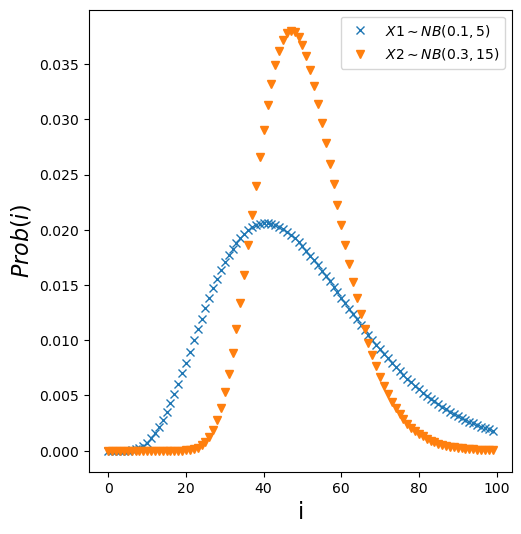

In [22]:
i = range(0, int(round(2*EX1, 0)))

p_X1_i = X1.pmf([xx for xx in i])
p_X2_i = X2.pmf([xx for xx in i])

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)

plt.plot(i, p_X1_i, 'x', label="$X1\\sim NB({{{0}}},{{{1}}})$".format(p, r))
plt.plot(i, p_X2_i, 'v', label="$X2\\sim NB({{{0}}},{{{1}}})$".format(round(p*m,2), r*m))

plt.xlabel("i", fontsize=16)
plt.ylabel('$Prob(i)$', fontsize=16)
plt.legend()
plt.show()

X1 peaks earlier and declines more rapidly, suggesting a higher peak probability, but the high variance indicates that the values are dispersed more widely around this peak. <br>
X2 indicates less variability in the overall outcomes despite the trials being more consistently around a higher mean. <br>

<h3> How can we determine which variable will reach R faster if we compare the production of defective products? </h3>

We need to calculate the probability of P(X1>X2) (or the other way around -  it doesn't matter).

For that, we need to calculate the upper bound and the lower bound.

In [23]:
R = range(r, int(m*r/p))
lower = [sum(X1.pmf(y)*(1-X2.cdf(y)) for y in range(r*m, i)) for i in R]
upper = [1-sum(X2.pmf(x)*(1-X1.cdf(x-1)) for x in range(r,i)) for i in R]

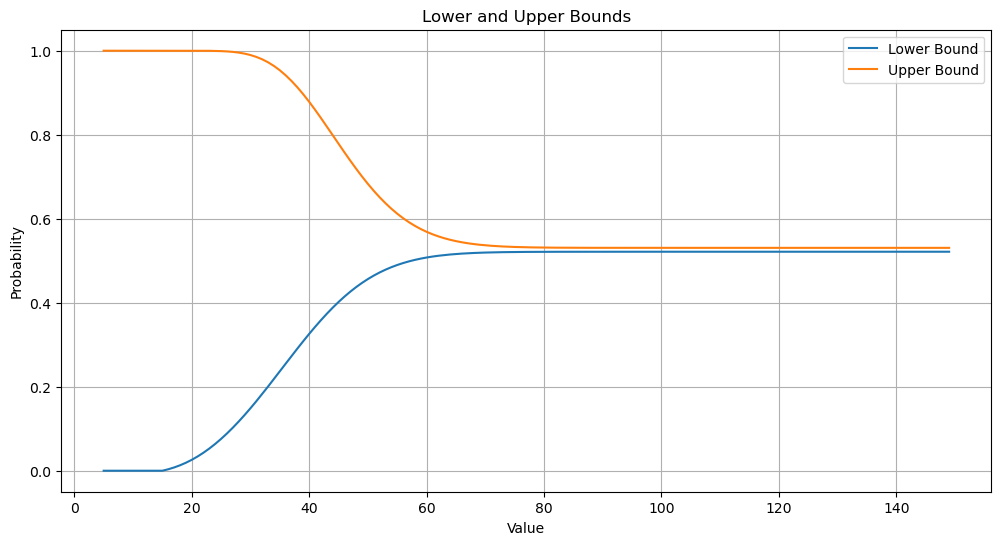

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(list(R), lower, label='Lower Bound')
plt.plot(list(R), upper, label='Upper Bound')
plt.title('Lower and Upper Bounds')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Finding the minimum value that represents the intersection point requires calculating the difference between the upper and lower bounds

In [25]:
difference_upper_lower = []
for u, l in zip(upper, lower):
    difference_upper_lower.append(abs(u-l))

position = difference_upper_lower.index(min(difference_upper_lower))
print(f'The lower bound probability of P(X1>X2) is {round(lower[position],3)}, whereas the upper bound probability is {round(upper[position],3)}.')

The lower bound probability of P(X1>X2) is 0.521, whereas the upper bound probability is 0.531.


$$ P(X1 > X2) \in [0.521, 0.531] $$

Therefore, X1 will reach the number of defective products (5) faster than X2 despite having a lower probability of producing defective products than X2.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br>

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

#### Solution - 2.A

Given:

In [26]:
N_SH, N_RG = 16000, 22000
mean_rent_SH, mean_rent_RG = 6300, 4200
median = 4600
# I defined the following variables
std_SH, std_RG = 250, 750

I used two different methods to generate the data.

Using explicity numbers to get the wanted results.

Gaussian Distribution combined with a condition until my constraints are met.

### Using Gaussian Distribution to generate the data

In [27]:
def gen_random_custom(N, mean, median, std):
    np.random.seed = 100
    temp_mean = mean

    # Lengths of arr1 and arr2
    arr_length = (N - 1) // 2

    if mean > median:
        mean_arr1= abs(median-std*6)
        # Generate arr1 and arr2
        arr1 = np.random.normal(mean_arr1, std, arr_length)  # Values less than median
        mid = [median, median]
        arr2 = np.random.normal(mean + std, std, arr_length)  # Values around and above
        while True:
            combined_array = np.concatenate((arr1, mid, arr2))
            current_mean = np.mean(combined_array)
            if int(current_mean) != int(mean):
                temp_mean += 1
                arr2 = np.random.normal(temp_mean, std, arr_length)
            else:
                break
        return np.concatenate((arr1, mid, arr2))
    else:
        mean_arr1= abs(median + std*4)
        # Generate arr1 and arr2
        arr1 = np.random.normal(mean_arr1, std, arr_length)  # Values more than median
        mid = [median, median]
        arr2 = np.random.normal(mean, std, arr_length)  # Values around and above
        while True:
            combined_array = np.concatenate((arr1, mid, arr2))
            current_mean = np.mean(combined_array)
            if int(current_mean) > int(mean):
                temp_mean -= 1
                arr2 = np.random.normal(temp_mean, std//4, arr_length)
                if temp_mean < 0:
                    break
            else:
                break
        return np.concatenate((arr1, mid, arr2))

In [28]:
samples_sh_sce1 = gen_random_custom(N_SH, mean_rent_SH, median, std_SH)
samples_rg_sce1 = gen_random_custom(N_RG, mean_rent_RG, median, std_RG)

#### Using explicity numbers to generate the data

In [29]:
arr_length = N_SH // 2
arr1 = np.array([4500,4500,4500,4200,4300,4400,4500, 4600] * int(arr_length/8))
arr2 = np.array([4600,7300,7600,8100,8200,9500,10000,10000] * int(arr_length/8))
samples_sh_sce2 = np.concatenate((arr1, arr2))

In [30]:
arr_length = N_RG // 2
arr1 = np.array([0, 500,1000,1000 , 1500,1500,3000, 3000, 4000, 4000, 4600] * int(arr_length/11))
arr2 = np.array([4600, 5000, 5200, 5500, 5500, 6500, 6500, 7000, 7500, 7500, 7500] * int(arr_length / 11))
samples_rg_sce2 = np.concatenate((arr1, arr2))

#### Graphing two possible scenarios of rent distribution in the two towns using histograms.

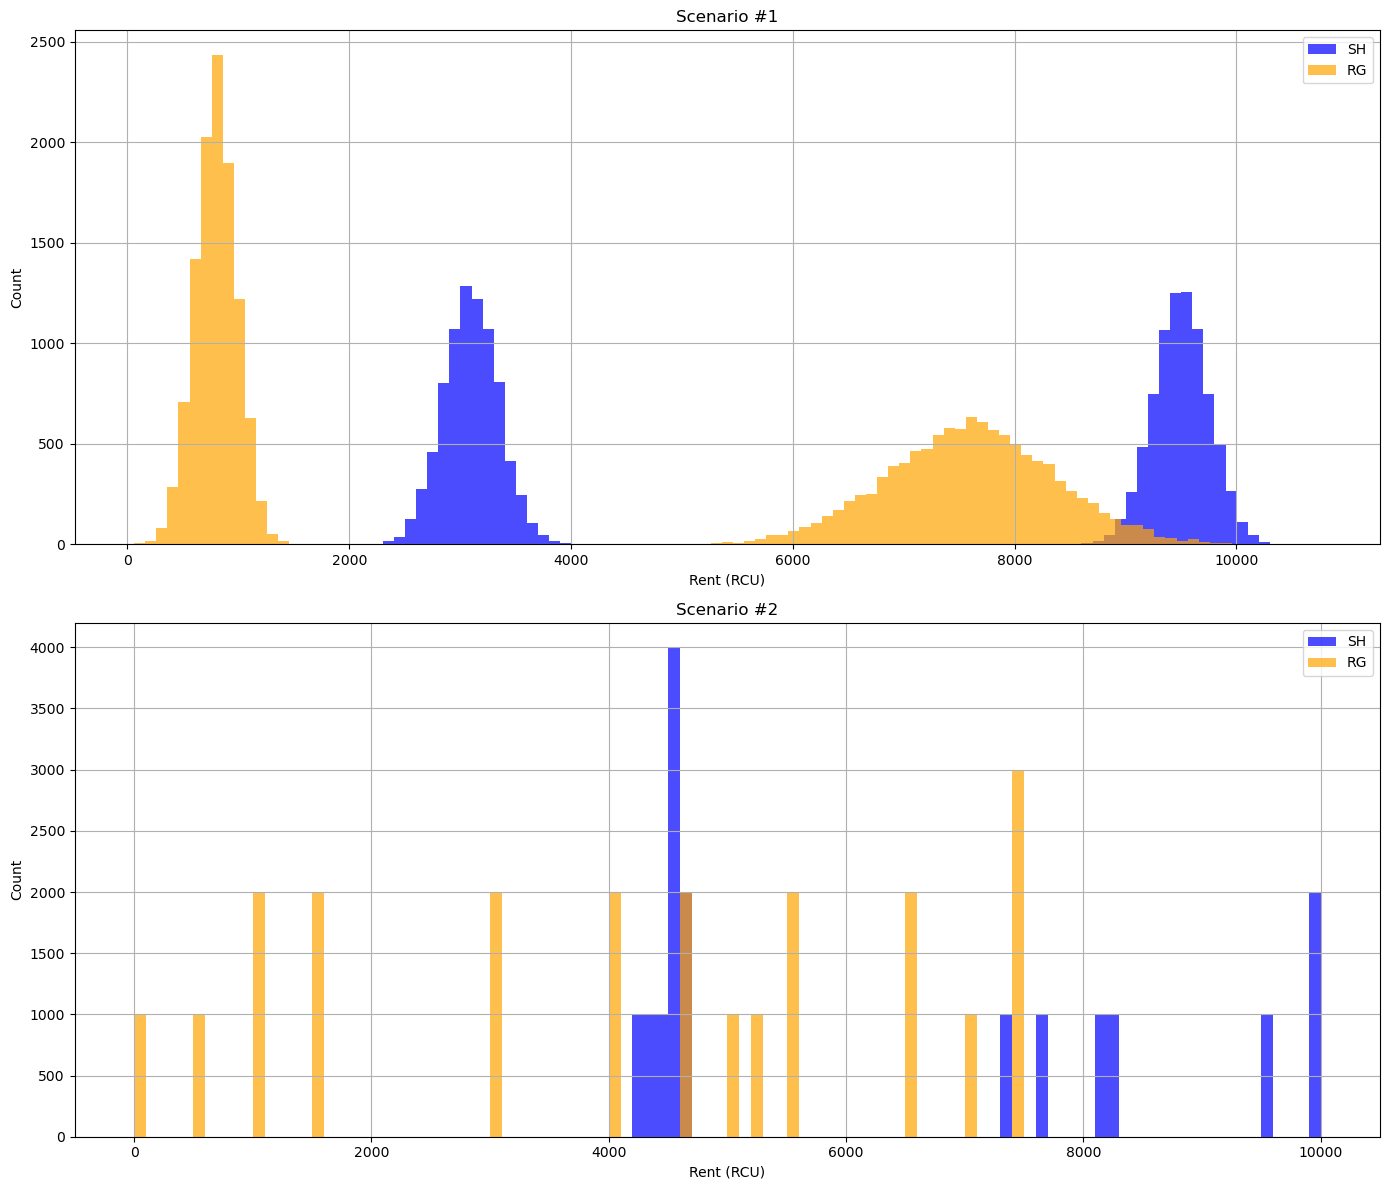

In [31]:
# Determine histogram ranges and bins
bin_width = 100
bins_sh_sce1 = np.arange(min(samples_sh_sce1), max(samples_sh_sce1) + bin_width, bin_width)
bins_rg_sce1 = np.arange(min(samples_rg_sce1), max(samples_rg_sce1) + bin_width, bin_width)

bins_sh_sce2 = np.arange(min(samples_sh_sce2), max(samples_sh_sce2) + bin_width, bin_width)
bins_rg_sce2 = np.arange(min(samples_rg_sce2), max(samples_rg_sce2) + bin_width, bin_width)

# Plot histograms for both scenarios
plt.figure(figsize=(14, 12))

# Scenario #1
plt.subplot(2, 1, 1)
plt.hist(samples_sh_sce1, bins=bins_sh_sce1, color='blue', alpha=0.7, label='SH')
plt.hist(samples_rg_sce1, bins=bins_rg_sce1, color='orange', alpha=0.7, label='RG')
plt.title('Scenario #1')
plt.xlabel('Rent (RCU)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

# Scenario #2
plt.subplot(2, 1, 2)
plt.hist(samples_sh_sce2, bins=bins_sh_sce2, color='blue', alpha=0.7, label='SH')
plt.hist(samples_rg_sce2, bins=bins_rg_sce2, color='orange', alpha=0.7, label='RG')
plt.title('Scenario #2')
plt.xlabel('Rent (RCU)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
def has_at_least_ten_non_zero_bins(data, bin_width):
    # Calculate the histogram bin counts and the bin edges
    counts, _ = np.histogram(data, bins=np.arange(min(data), max(data) + bin_width, bin_width))
    # Count the number of non-zero bins
    non_zero_bin_count = np.count_nonzero(counts)
    # Check if there are at least 10 non-zero bins
    return non_zero_bin_count >= 10

In [33]:
def get_iqr(data):
    q3, q1 = np.percentile(data, [75, 25])
    return q3 - q1

In [34]:
def process_scenario(data, scenario_name):
    return {
        'Scenario': scenario_name,
        'Size:' : len(data),
        'Mean': floor(np.mean(data)),
        'Median': f"{round(np.median(data),2):,}",
        'Standard Deviation': f"{round(np.std(data),2):,}",
        'Variance': f"{round(np.var(data),2):,}",
        'IQR': f"{round(get_iqr(data),2):,}",
        '10+ Non-Zero Bins': has_at_least_ten_non_zero_bins(data, 100)
    }

#### Summary of the results - Scenario 1 and 2

In [35]:
# Process each scenario
scenario_1_sh = process_scenario(samples_sh_sce1, 'Scenario 1 - Stochastic Heights')
scenario_1_rg = process_scenario(samples_rg_sce1, 'Scenario 1 - Random Grove')
scenario_2_sh = process_scenario(samples_sh_sce2, 'Scenario 2 - Stochastic Heights')
scenario_2_rg = process_scenario(samples_rg_sce2, 'Scenario 2 - Random Grove')
df = pd.DataFrame([scenario_1_sh, scenario_1_rg, scenario_2_sh, scenario_2_rg])

# Function to colorize the '10+ Non-Zero Bins' column
def colorize_bins(val):
    color = 'green' if val else 'red'
    return f'color: {color}'

# Styling the DataFrame
styled_df = df.style.applymap(colorize_bins, subset=['10+ Non-Zero Bins'])
styled_df


,Scenario,Size:,Mean,Median,Standard Deviation,Variance,IQR,10+ Non-Zero Bins
0,Scenario 1 - Stochastic Heights,16000,6300,"4,600.0","3,211.57","10,314,193.96","6,405.33",True
1,Scenario 1 - Random Grove,22000,4200,"4,600.0","3,445.99","11,874,819.22","6,804.46",True
2,Scenario 2 - Stochastic Heights,16000,6300,"4,600.0","2,206.81","4,870,000.0","3,625.0",True
3,Scenario 2 - Random Grove,22000,4200,"4,600.0","2,391.08","5,717,272.73","5,000.0",True


#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

#### Solution - 2.B

In [36]:
arr_length = N_SH // 2
arr1 = np.array([2000,2500,3000, 3000,3500,4000,4500, 4600] * int(arr_length/8))
arr2 = np.array([4600,7100,7000,7000,9500,12000,13000,13500] * int(arr_length/8))
samples_sh_sce3 = np.concatenate((arr1, arr2))

In [37]:
arr_length = N_RG // 2
arr1 = np.array([0, 500,1000,1000 , 1500,1500,3000, 3000, 4000, 4000, 4600] * int(arr_length/11))
arr2 = np.array([4600, 5000, 5200, 5500, 5500, 6500, 6500, 7000, 7500, 7500, 7500] * int(arr_length / 11))
samples_rg_sce3 = np.concatenate((arr1, arr2))

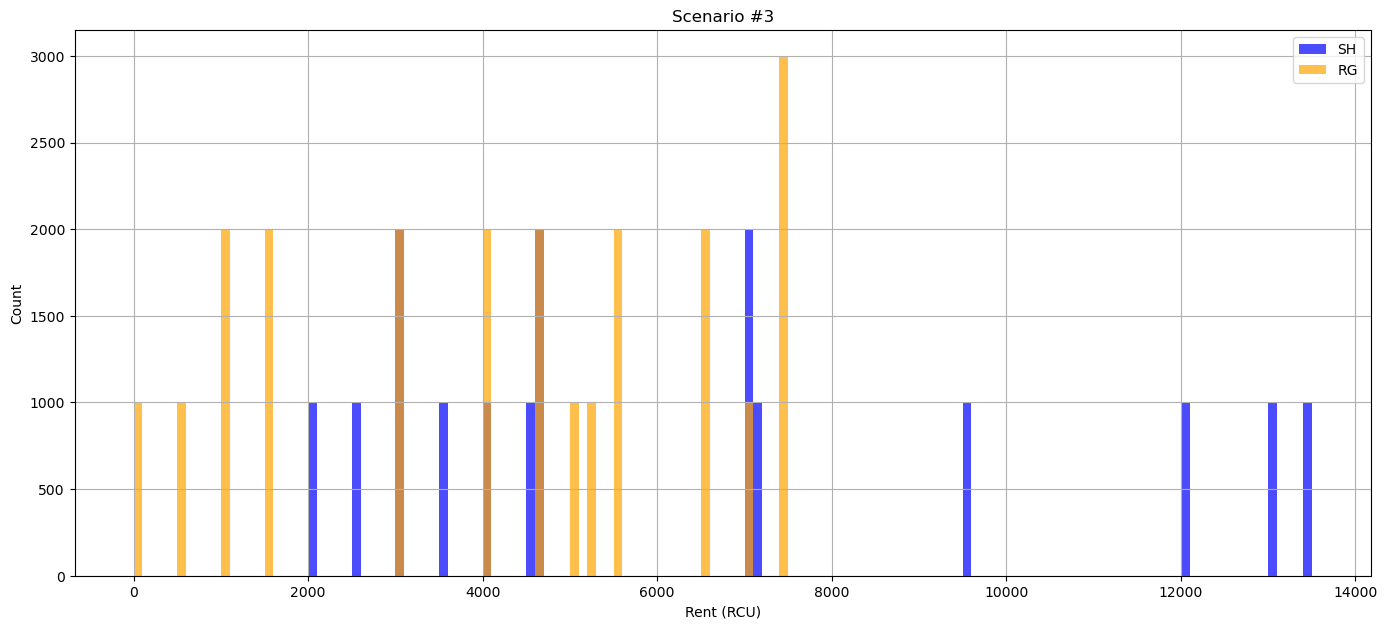

In [38]:
# Determine histogram ranges and bins
bin_width = 100

bins_sh_sce3 = np.arange(min(samples_sh_sce3), max(samples_sh_sce3) + bin_width, bin_width)
bins_rg_sce3 = np.arange(min(samples_rg_sce3), max(samples_rg_sce3) + bin_width, bin_width)

plt.figure(figsize=(14, 12))

# Scenario #3
plt.subplot(2, 1, 1)
plt.hist(samples_sh_sce3, bins=bins_sh_sce3, color='blue', alpha=0.7, label='SH')
plt.hist(samples_rg_sce3, bins=bins_rg_sce3, color='orange', alpha=0.7, label='RG')
plt.title('Scenario #3')
plt.xlabel('Rent (RCU)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Summary of the results - Scenario 3

In [39]:
scenario_3_sh = process_scenario(samples_sh_sce3, 'Scenario 3 - Stochastic Heights')
scenario_3_rg = process_scenario(samples_rg_sce3, 'Scenario 3 - Random Grove')
df = pd.DataFrame([scenario_3_sh, scenario_3_rg])

# Styling the DataFrame
styled_df = df.style.applymap(colorize_bins, subset=['10+ Non-Zero Bins'])
styled_df

,Scenario,Size:,Mean,Median,Standard Deviation,Variance,IQR,10+ Non-Zero Bins
0,Scenario 3 - Stochastic Heights,16000,6300,"4,600.0","3,690.7","13,621,250.0","4,325.0",True
1,Scenario 3 - Random Grove,22000,4200,"4,600.0","2,391.08","5,717,272.73","5,000.0",True


In addition to meeting all the requirements in request 2.A, we changed the data to have a higher value of variance in Stochastic Heights against Random Grove.By increasing the values at the edge of the array, we avoided affecting the subtraction of precentile 75 and precentile 25 (IQR).

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that $X$ is a vector of counts.


2. Consider the random variable $Y = X_2 + X_3 + X_4$.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to results from class and explain your observation.

#### Solution 3

In [61]:
n = 20
p = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
k = 100

X = multinomial(n, p)

# Generate k samples
samples = X.rvs(k)

# Calculate Y = X2 + X3 + X4 for each sample
Y = np.sum(samples[:, 1:4], axis=1)

Y_mean = np.mean(Y)

third_moment = np.mean((Y-Y_mean)**3)

print(third_moment)

0.3183059999999985


In class, we reached the following equation for calculating the $3^{rd}$ central moment:

$γ_3 = np(1-p)(1-2p)$

Since we're calculating the centralized third moment of Y, we should first calculate $p_Y$:

$p_Y = p_{X_2} + p_{X_3} + p_{X_4} = 0.1 + 0.1 + 0.1 = 0.3$

Upon inserting the values of $n=20$ and $p_Y=0.3$ to the equation above, we get that $γ_3 = np(1-p)(1-2p) = 20*0.3*0.7*0.4 = 1.68$, which does not equal than the `third_moment` value we recieved with our calculations above.

In fact, every time we run the snippet above we recieve a different value for the third moment. The reason for that is based on the fact that the amount of experiments we used ($k=100$) is relatively low. In order to see the calculations converge on a value (in our case it's $1.68$), we would need to raise k by several orders of magnitude. If for example we raise the amount of experiments so that $k=100,000$, the empirical centralized third moment we get is $1.689$.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

#### Solution - 4.A

In [41]:
def convolve(arr1, arr2):
    results = [0] * (len(arr1) + len(arr2) -1)
    for i in range(len(arr1)):
        for j in range(len(arr2)):
            results[i+j] += arr1[i] *arr2[j]
    return results

In [42]:
def NFoldConv(P, n):
    # Convert distribution P into a list with probabilities ordered by outcome
    max_val = max(P.keys())
    # Extracting the probabilities from the dictionary
    distribution_list = [P.get(i, 0) for i in range(max_val + 1)]

    result = np.array(distribution_list)
    # # Convolve n-1 times
    for _ in range(n - 1):
        result = convolve(result, distribution_list)

    # Convert the result back to a dictionary format
    Q = {i: prob for i, prob in enumerate(result)}
    return Q

In [43]:
# Example usage
P = {0: 0.2, 1: 0.5, 2: 0.3}
n = 5
Q = NFoldConv(P, n)
print(Q)

{0: 0.00032000000000000013, 1: 0.004000000000000001, 2: 0.022400000000000003, 3: 0.07400000000000001, 4: 0.1597, 5: 0.23525, 6: 0.23954999999999999, 7: 0.1665, 8: 0.07559999999999999, 9: 0.020249999999999997, 10: 0.00243}


#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 independent times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


Solution - 4.B

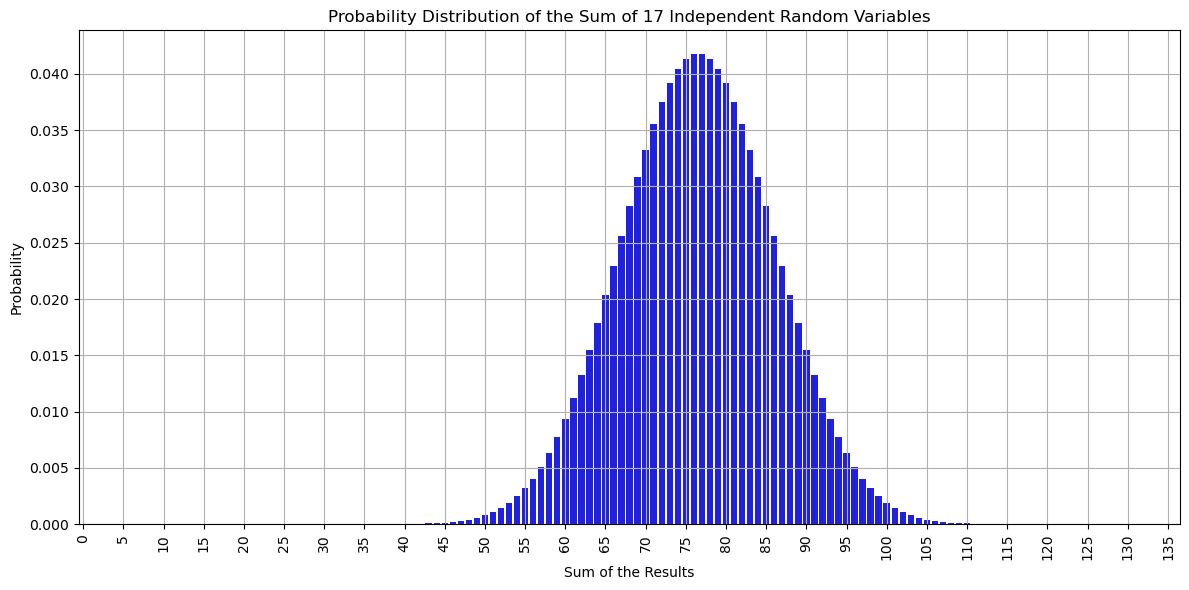

In [44]:
p = {i: 1/8 for i in range(1, 9)}
P = NFoldConv(p, 17)

X = list(P.keys())
Y = list(P.values())

# plot and set parameters
plt.figure(figsize=(12, 6))
sns.barplot(x=X, y=Y, color='blue')
plt.title('Probability Distribution of the Sum of 17 Independent Random Variables')
plt.xlabel('Sum of the Results')
plt.ylabel('Probability')

# adjust the x-ticks
tick_spacing = 5
plt.xticks(ticks=range(0, len(X), tick_spacing), labels=range(min(X), max(X)+1, tick_spacing), rotation=90)

# show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

Since we are summing a large number of independent random variables (17 rolls), the distribution of the sum is approaching a normal distribution, which is following the Central Limit Theorem.

Also, we can see that the probability to get a sum of 17 rolls to be less than 17 is 0, which makes sense since by rolling a fair octahedron 17 times, the sum of the results is at least 17.

In [45]:
print(f'All probabilities to get the sum from 0 to 16 are equal to {sum([P.get(i, 0) for i in range(0,17)])}')

All probabilities to get the sum from 0 to 16 are equal to 0.0


It is only possible to get the sum of 17 by getting the number 1 17 times in a row, which obviously has very low probability.


As can also be seen from the graph, the distribution is symmetric with a value of 76.5 for the Expected Value.


In [46]:
np.sum(np.array(X)*np.array(Y))

76.5

### Question 5 - Counting Similar Strings



Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 5.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

#### Solution 5.A

$W$ as a binomial random variable $W \sim \text{Bin}(n, p)$.

This is because $W$ counts the number of successes (in this case, the number of times we get a 1) in $n$ independent Bernoulli trials, each with a success probability of $p$.

In the specific example, if $n = 100$ and $p = 0.3$, then $W$ is distributed as $W \sim \text{Bin}(100, 0.3)$.

The distribution of W is a binomial distribution.

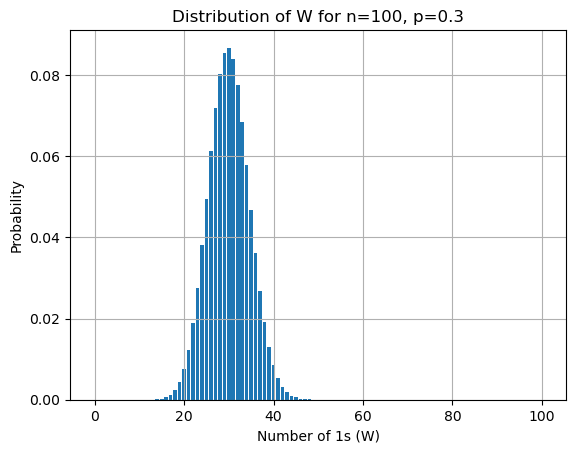

In [47]:
n = 100
p = 0.3
W = binom(n, p)
probabilities = [W.pmf(w) for w in range(n+1)]
plt.bar(range(n+1), probabilities)
plt.title('Distribution of W for n=100, p=0.3')
plt.xlabel('Number of 1s (W)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

#### 5.B
State a formula for computing $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

#### Solution 5.B

The formula for computing $E(C)$ is:

$E(C)=Σ_{ω∈Ω}C(ω)P(ω)$ which is equal to $Σ_{k=0}^nC_kP(W=k)$, where $C_k$ is the number of different outcomes in Ω that have $k$ 1s, and $P(W=k)$ is the probability of having $k$ 1s, which is what we computed previously and is given by the binomial distribution.

Since C is the number of permutations of the same number of 1s we can easily compute that value by ${n \choose k}$.


In [48]:
def n_choose_k(n,k):
    return factorial(n) / (factorial(k) * factorial(n-k))

In [49]:
def compute_expected_c(n, p):
    W = binom(n, p)
    probabilities = [W.pmf(w) for w in range(n+1)]

    expected_c = 0

    for k in range(n+1):
        c_w = n_choose_k(n,k)
        expected_c += probabilities[k] * c_w

    return expected_c

In [50]:
p_values = [0.1, 0.5, 0.8]
n_values = [10, 20, 50, 100]
expected_c = np.zeros((len(p_values), len(n_values)))
for i,p in enumerate(p_values):
    for j,n in enumerate(n_values):
        expected_c[i][j] = compute_expected_c(n, p)
        print(f'E(C) = {compute_expected_c(n, p):.3f} for p = {p} and n = {n}')

E(C) = 22.576 for p = 0.1 and n = 10
E(C) = 1757.746 for p = 0.1 and n = 20
E(C) = 1479309659.773 for p = 0.1 and n = 50
E(C) = 16815694309212327936.000 for p = 0.1 and n = 100
E(C) = 180.426 for p = 0.5 and n = 10
E(C) = 131460.694 for p = 0.5 and n = 20
E(C) = 89609514959899.969 for p = 0.5 and n = 50
E(C) = 71430183238031679676471050240.000 for p = 0.5 and n = 100
E(C) = 66.950 for p = 0.8 and n = 10
E(C) = 16979.432 for p = 0.8 and n = 20
E(C) = 490151964857.802 for p = 0.8 and n = 50
E(C) = 2013008191527901219258368.000 for p = 0.8 and n = 100


#### 5.C
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$.

#### Solution 5.C

In order to answer this question, we first used the following function to generate the result of a simple trial with n=3, p = 0.2, and 10 trials.

In [51]:
def empirical_values_example(n, p, num_trials=10):
    c = [[0 for j in range(n)] for i in range(num_trials)]
    np.random.seed = 10
    for i in range(len(c)):
        for j in range(len(c[i])):
            c[i][j] = binom.rvs(1, p)  # Assign a random value from a binomial distribution
    return c
empirical_values_example(3, 0.2, num_trials=10)

[[1, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [1, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 0]]

We can see the results of the test, our counter of 1's in each trial which represented with W can be for example:

W(1) = 1,
W(2) = 1,
W(3) = 1,
W(4) = 1,
W(5) = 2
...

And so on.


Now to calcualte the empirical $C(ω)$ which defiend as follows:

$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

It counts how many sequences in Ω, in general, have the same number of 1s as the specific sequence.

Let's say, for example, that in my mini-trial W(ζ=1) = 1, which produces the following output:

[1, 0, 0]

In Ω we can also have the following:

[0, 1, 0]

[0, 0, 1]

In other words, all possible arrangements of 1 in a string of 3.

This can also be calculated by applying the binomial coefficient:

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

In my example:

$\binom{3}{1} = \frac{3!}{1!(3-1)!} = 3$


Now that we've figured out C's behavior, we can calculate the values and the empirical average for all the given n's and p's.

In [52]:
def empirical_values_c(n, p, num_trials=1000):
    # Generate a 2D NumPy array of binomial random values
    W = np.random.binomial(1, p, (num_trials, n))
    W = [np.sum(i) for i in W]
    C = np.array([n_choose_k(n,i) for i in W])
    return C

In [53]:
avg_c = np.zeros((len(p_values), len(n_values)))
for i, p in enumerate(p_values):
    for j, n in enumerate(n_values):
        # Calculate the mean and assign it to the correct position in avg_c
        avg_c[i][j] = np.mean(empirical_values_c(n, p, num_trials=1000))

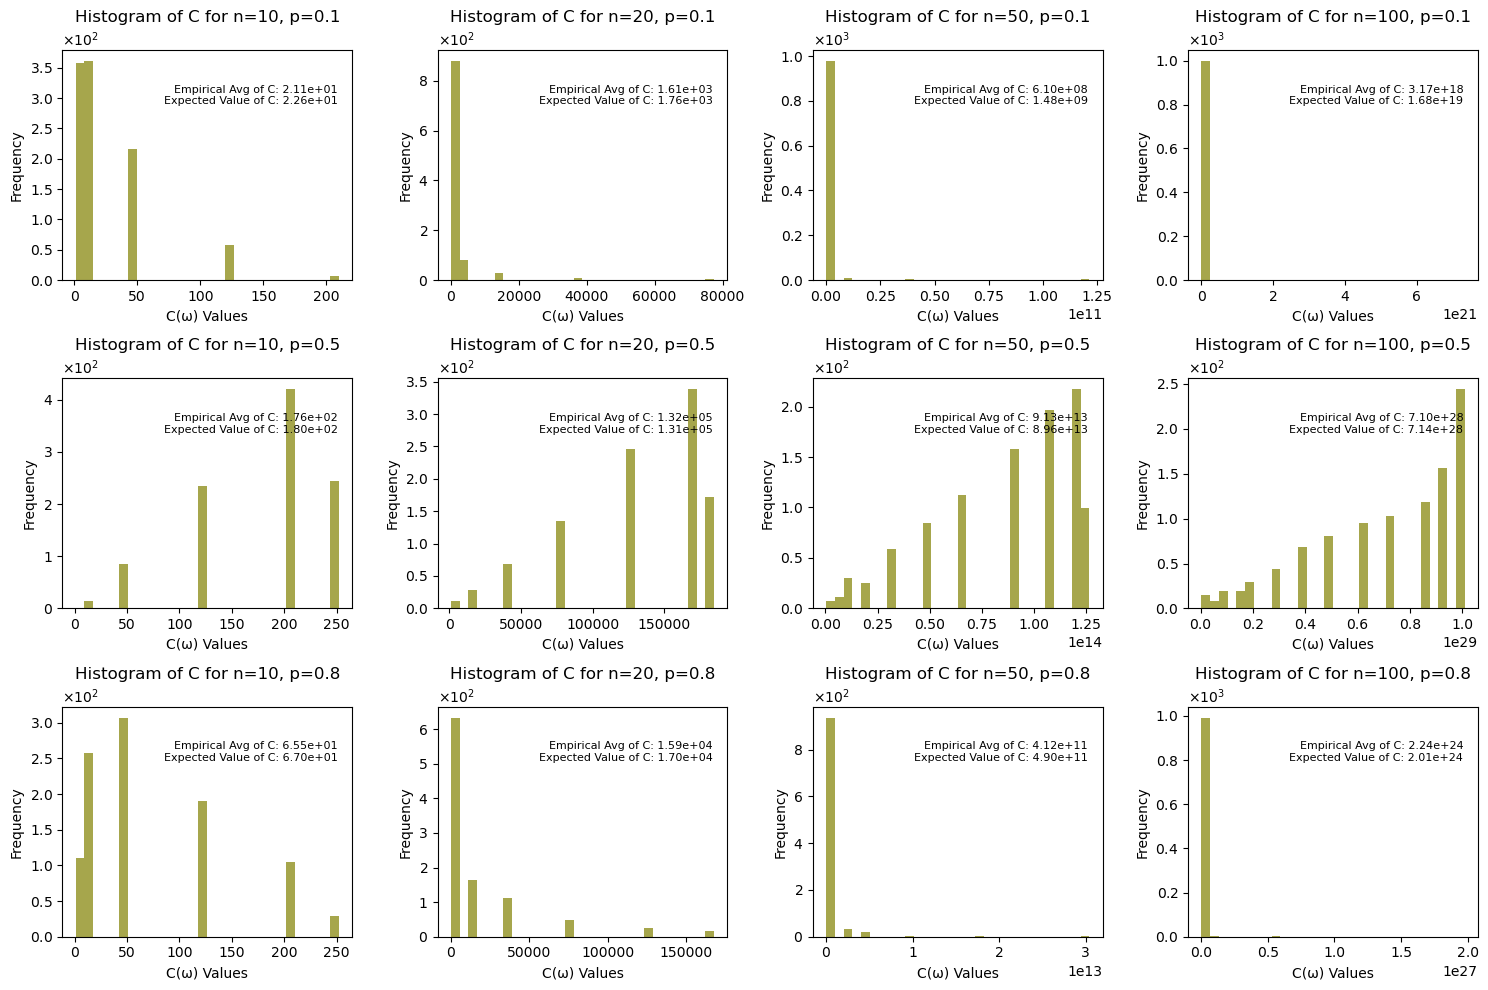

In [54]:
import matplotlib.ticker as mticker

fig, axes = plt.subplots(len(p_values), len(n_values), figsize=(15, 10), squeeze=False)

for i, p in enumerate(p_values):
    for j, n in enumerate(n_values):
        C = empirical_values_c(n, p)
        ax = axes[i][j]
        ax.hist(C, bins=30, color='olive', alpha=0.7)
        ax.set_title(f'Histogram of C for n={n}, p={p}')
        ax.set_xlabel('C(ω) Values')
        ax.set_ylabel('Frequency')

        ax.text(0.95, 0.85,
                f'Empirical Avg of C: {avg_c[i][j]:.2e}\nExpected Value of C: {expected_c[i][j]:.2e}',
                transform=ax.transAxes,
                horizontalalignment='right', verticalalignment='top',
                fontsize=8)

for ax in axes.flatten():
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()


#### 5.D
Use a scatter plot to compare the empirical and the computed values from the previous section.

#### Solution - 5.D

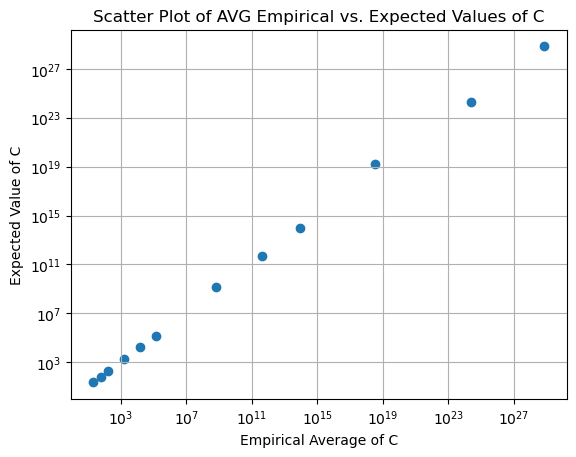

In [55]:
# Flatten the avg_c and expected_c lists for plotting
empirical_values = [avg for sublist in avg_c for avg in sublist]
computed_values = [exp for sublist in expected_c for exp in sublist]

plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of AVG Empirical vs. Expected Values of C')
plt.xlabel('Empirical Average of C')
plt.ylabel('Expected Value of C')
plt.scatter(empirical_values, computed_values)
plt.grid(True)
plt.show()


It is clear that the average empirical values and the expected values are correlated.

### Question 6 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 6.A
Write code to compute the exact value of $E(T_{N})$

#### Solution - 6.A

In class we proved that $E(T_N) = nH(n)$ where $H(n)$ is considered the $n_{th}$ harmonic number, and the equation to calculate it is:

$H_n=∑_{k=1}^n {1 \over k}$

In [64]:
def calc_nth_harmonic_number(n):
    return sum(1/(i) for i in range(1, n+1))

def calc_expected_wait(n):
    return n * calc_nth_harmonic_number(n)

In [66]:
calc_nth_harmonic_number(100)

5.187377517639621

#### 6.B
Write code to compute the exact value of $V(T_{N})$

#### Solution - 6.B

In class we proved that $Var(T_N)=n^2∑_{i=1}^n {1 \over i^2}-nH(n)$.

In [67]:
def calc_wait_variance(n):
    return n**2 * sum(1/(i**2) for i in range(1, n+1)) - n*calc_nth_harmonic_number(n)

In [68]:
calc_wait_variance(100)

15831.101250084961

#### 6.C
Write code to exactly compute $P(T_{30}>60)$

#### Solution - 6.C

In [69]:
def calc_cdf_probability(num_coupons, k):
    # create the probabilities for the geometric distribution
    probabilities = (num_coupons - np.arange(num_coupons)) / num_coupons
    # array of timepoints for collecting a coupon
    timepoints = np.arange(k) + 1

    p = geom.pmf(timepoints, probabilities[0])
    for probability in probabilities[1:]:
        p_i = geom.pmf(timepoints, probability)
        p = np.convolve(p, p_i)

    return 1 - sum(p[:k - num_coupons + 1])

print(calc_cdf_probability(num_coupons=30, k=60))

0.9940158432042814


In [70]:
def calc_cdf_probability(num_coupons, k):
    # create the probabilities for the geometric distribution
    probabilities = (num_coupons - np.arange(num_coupons)) / num_coupons
    # array of timepoints for collecting a coupon
    timepoints = np.arange(k) + 1

    p = geom.pmf(timepoints, probabilities[0])
    for probability in probabilities[1:]:
        p_i = geom.pmf(timepoints, probability)
        p = np.convolve(p, p_i)

    return sum(p[:k - num_coupons + 1])

print(calc_cdf_probability(num_coupons=2, k=3))

0.75


#### 6.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Compute $E(S_{60})$ - the expected value of the time it will take to observe $N/2=60/2=30$ from the total of $N=60$ coupon types

#### Solution - 6.D

As we proved in class, $E(T_N)=∑_{k=1}^n {n \over n-k+1}=nH(n)$.

To compute $E(S_{60})$ in order to measure the time to get half the coupons, we need to compute the following sum: $∑_{k=1}^{n/2} {n \over n-k+1}$, which is equal to:

 $nH(n) - nH({n\over2})=n(H(n) - H({n\over2}))$


In [59]:
n = 60

print(n * (calc_nth_harmonic_number(n) - calc_nth_harmonic_number(n//2)))

41.09299692188073


#### 6.E
Write code to exactly compute $P(S_{60}>60)$

#### Solution - 6.E

In [60]:
def calc_partial_cdf_probability(num_coupons, k, to_collect):
    probabilities = (num_coupons - np.arange(num_coupons)) / num_coupons
    probabilities = probabilities[:to_collect]

    timepoints = np.arange(k) + 1

    p = geom.pmf(timepoints, probabilities[0])
    for probability in probabilities[1:]:
        p_i = geom.pmf(timepoints, probability)
        p = np.convolve(p, p_i)

    return 1 - sum(p[:k - to_collect + 1])

print(calc_partial_cdf_probability(num_coupons=60, k=60, to_collect=30))

0.0001721650647358297
